In [21]:
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.tree import export_graphviz
from graphviz import Source


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline



from sklearn.decomposition import PCA # 차원 축소 => features의 개수를 줄여준다.
from sklearn.pipeline import make_pipeline

# <span style='background-color:#fff5b1'>과적합과 일반화

- **Generalization (일반화)**
    - 모델이 새로운 데이터셋(테스트 데이터)에 대하여 정확히 예측하면 이것을 일반화 되었다고 말한다. 
        - 우리가 가진 데이터를 샘플(표본), 우리가 예측할 대상을 모집단 이라고 할 때 내가 가진 샘플 데이터셋이 아니라 모집단 전체에 대한 데이터의 일반적인 특성을 잘 찾은 모델의 상태를 일반화라고 한다.
    - 모델이 훈련 데이터로 평가한 결과와 테스트 데이터로 평가한 결과의 차이가 거의 없고 좋은 평가지표를 보여준다.

- <span style='background-color:#fff5b1'><b style='font-size:1.3em'>**Overfitting (과대적합)**</b>
    - 모델이 훈련 데이터에 대한 예측성능은 **너무** 좋지만 일반성이 떨어져 새로운 데이터(테스트 데이터)에 대해선 성능이 좋지 않은 것을 Overfitting이라고 한다. 
    - 이는 모델이 훈련 데이터 세트의 특징을 너무 맞춰서 학습 되었기 때문에 일반적으로 나타나지 않을 특징까지 학습되어 새로운 데이터셋(테스트세트)에 대한 예측 성능이 떨어지게 된다.
        

>- train set을 학습시킬때는 좋을 수도 있다.

- <span style='background-color:#fff5b1'><b style='font-size:1.3em'>**Underfitting (과소적합)**</b>
    - 모델이 훈련 데이터과 테스트 데이터셋 모두에서 성능이 안좋은 것을 말한다.
    - 모델이 너무 간단하여 훈련 데이터에 대해 충분히 학습하지 못해 데이터셋의 패턴들을 다 찾아내지 못해서 발생한다.

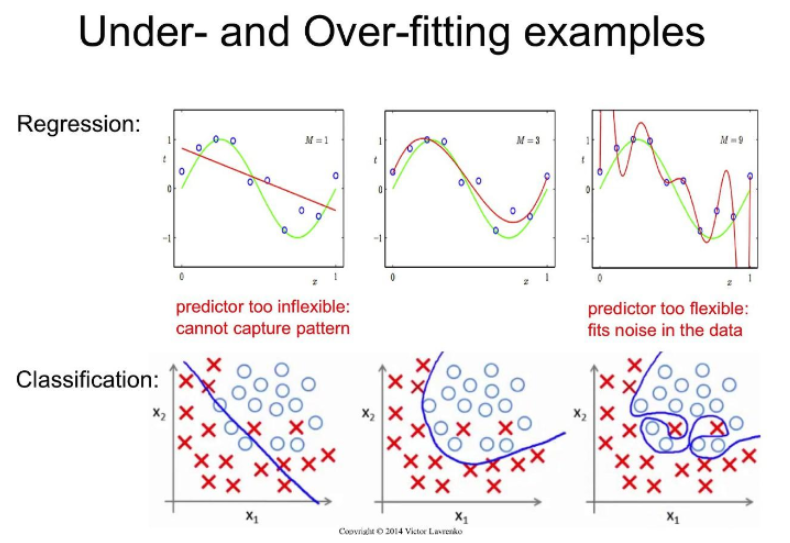  

## Overfitting(과대적합)의 원인
- 학습 데이터 양에 비해 모델이 너무 복잡한 경우 발생.
    - 데이터의 양을 늘린다. 
        - 시간과 돈이 들기 때문에 현실적으로 어렵다.
    - 모델을 좀더 단순하게 만든다.
        - 사용한 모델보다 좀더 단순한 모델을 사용한다.
        - 모든 모델은<span style='background-color:#fff5b1'> 모델의 복잡도</span>를 변경할 수 있는 <span style='background-color:#fff5b1'>**규제와 관련된 하이퍼파라미터**</span>를 제공하는데 이것을 조절한다.

- 앙상블 모델들이 조금 복잡하다
- 딥러닝 모델들도 조금 복잡하다.

## Underfitting(과소적합)의 원인
- 데이터 양에 비해서 모델이 너무 단순한 경우 발생
    - 좀더 복잡한 모델을 사용한다.
    - 모델이 제공하는 규제 하이퍼파라미터를 조절한다.

> - 복잡한 모델, 단순한 모델
>    - 이상치같은 복잡한 값들에 반응하는(패턴을 찾는) 모델 그래서 이상치에 약한 모델 이라고도 설명할 수 있겠다.

## 규제 하이퍼파라미터란?
- 모델의 복잡도를 규제하는 하이퍼파라미터로 Overfitting이나 Underfitting이 난 경우 이 값을 조정하여 모델이 일반화 되도록 도와준다.
- 이 규제 하이퍼파라미터들은 모든 머신러닝 모델마다 있다.

> ### 하이퍼파라미터란
>- **하이퍼파라미터 (Hyper Parameter)**
>    - 모델의 성능에 영향을 끼치는 파라미터 값으로 모델 생성시 사람이 직접 지정해 주는 값(파라미터)
>- **하이퍼파라미터 튜닝(Hyper Parameter Tunning)**
>    - 모델의 성능을 가장 높일 수 있는 하이퍼파라미터를 찾는 작업
>- **파라미터(Parameter)**
>    - 머신러닝에서 파라미터는 모델이 데이터 학습을 통해 직접 찾아야 하는 값을 말한다.

In [64]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 0)

### 위스콘신 유방암 데이터셋 모델링

##### 데이터 로딩 및 train/test set 분리

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def tree_modeling(X, y, max_depth = None):
    
    tree = DecisionTreeClassifier(max_depth = max_depth, random_state = 0)
    tree.fit(X, y)
    
    return tree

def tree_accuracy(X, y, model, title):
    
    print(title, accuracy_score(y, model.predict(X)))

##### 모델 생성 , 학습, 추론
- DecisionTreeClassifier

In [66]:
print('max_depth = 1')
tree = tree_modeling(X_train, y_train, 1)
tree_accuracy(X_train, y_train, tree, 'train set')
tree_accuracy(X_test, y_test, tree, 'test set')

max_depth = 1
train set 0.9295774647887324
test set 0.8881118881118881


In [67]:
print('max_depth = 2')
tree2 = tree_modeling(X_train, y_train, 2)
tree_accuracy(X_train, y_train, tree2, 'train set')
tree_accuracy(X_test, y_test, tree2, 'test set')

max_depth = 2
train set 0.931924882629108
test set 0.8881118881118881


>- train set이 더 올라간 것은 과대적합이 더 발생했다는 뜻

In [68]:
print('max_depth = 3')
tree3 = tree_modeling(X_train, y_train, 3)
tree_accuracy(X_train, y_train, tree3, 'train set')
tree_accuracy(X_test, y_test, tree3, 'test set')

max_depth = 3
train set 0.9765258215962441
test set 0.916083916083916


In [69]:
print('max_depth = 5')
tree5 = tree_modeling(X_train, y_train, 5)
tree_accuracy(X_train, y_train, tree5, 'train set')
tree_accuracy(X_test, y_test, tree5, 'test set')

max_depth = 5
train set 1.0
test set 0.9020979020979021


##### 평가

##### 트리 구조 시각화 - graphviz 이용

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from graphviz import Source
from sklearn.metrics import accuracy_score

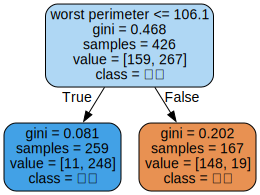

In [71]:
from sklearn.tree import export_graphviz
from graphviz import Source
import numpy as np

graph = Source(export_graphviz(tree,
                              feature_names = data.feature_names
                              ,class_names = ['악성', '양성'] # class 이름.
                               , rounded = True # 모서리를 라운드 시킨다.
                               , filled = True # 다수 클래스를 색으로 확인 할 수 있도록 색을 채운다.
                              ))

graph

In [8]:
1-30/426

0.9295774647887324

- 259개의 샘플중 11은 0이고 248은 1이다.

In [10]:
# 현재 노드를 분리하기 위한 질문
# worst perimeter <= 106.1
# ----------------------------
# 현재 노드의 상태
# gini = 0.468            지니계수 - 계산된 불순도. 0(분순도가 가장 낮다.) ~ 0.5(불순도가 가장 높다.)
# samples = 426    ㅁ       데이터 개수
# value = [159, 267]      클래스별 데이터 개수
# class = 양성             다수 클래스의 클래스 이름

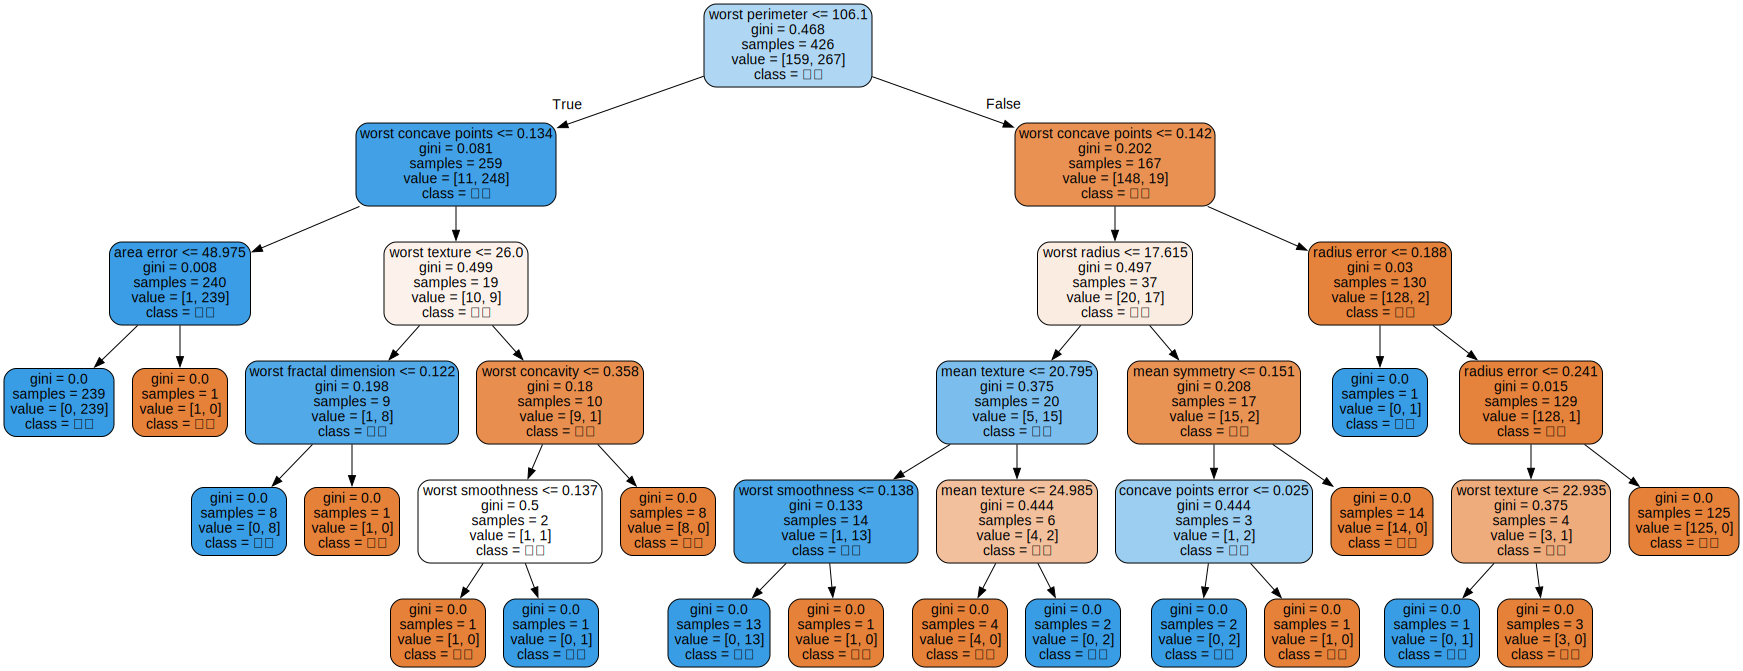

In [11]:
graph = Source(export_graphviz(tree5,
                              feature_names = data.feature_names
                              ,class_names = ['악성', '양성'] # class 이름.
                               , rounded = True # 모서리를 라운드 시킨다.
                               , filled = True # 다수 클래스를 색으로 확인 할 수 있도록 색을 채운다.
                              ))

graph

In [12]:
# [11, 248]
a = np.array([1, 239])
a / a.sum()

array([0.00416667, 0.99583333])

In [13]:
import os
os.getcwd()

'/Users/seokminlee/Desktop/mose/4. MachineLearn/template'

In [14]:
# 파일저장
export_graphviz(tree,
                out_file = '/Users/seokminlee/Desktop/mose/4. MachineLearn/template/tree.dot',
                              feature_names = data.feature_names
                              ,class_names = ['악성', '양성'] 
                               , rounded = True 
                               , filled = True 
                              )

In [15]:
!dot -Tpng /Users/seokminlee/Desktop/mose/"4. MachineLearn"/template/tree.dot -o tree.png

## Decision Tree 복잡도 제어(규제 파라미터)
- Decision Tree 모델을 복잡하게 하는 것은 노드가 너무 많이 만들어 지는 것이다. 
    - 노드가 많이 만들어 질수록 훈련데이터셋에 Overfitting 된다.
- 적절한 시점에 트리 생성을 중단해야 한다.

- 모델의 복잡도 관련 주요 하이퍼파라미터
    - **max_depth**: 트리의 최대 깊이
    - **max_leaf_nodes** : 리프노드 개수
    - **min_samples_leaf** : leaf 노드가 되기위한 최소 샘플수 

# 최적의 하이퍼파라미터 찾기

## 최적의 max_depth 찾기

In [74]:
max_depth_candidate = [1, 2, 3, 4, 5, None] # None - 완전히 나눠질때까지 분기.
# 평가 결과를 담을 리스트
train_acc_list = []
test_acc_list = []

for depth in max_depth_candidate:
    tree = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    tree.fit(X_train, y_train)
    
    train_pred = tree.predict(X_train)
    test_pred = tree.predict(X_test)
    
    train_acc_list.append(accuracy_score(y_train, train_pred))
    test_acc_list.append(accuracy_score(y_test, test_pred))

In [75]:
import pandas as pd

result_df = pd.DataFrame({
    'max_depth': max_depth_candidate,
    'train':train_acc_list,
    "test":test_acc_list
})
result_df

,max_depth,train,test
0,1.0,0.929577,0.888112
1,2.0,0.931925,0.888112
2,3.0,0.976526,0.916084
3,4.0,0.985915,0.909091
4,5.0,1.000000,0.902098
5,NaN,1.000000,0.902098




### - 결과확인

<AxesSubplot: xlabel='max_depth'>

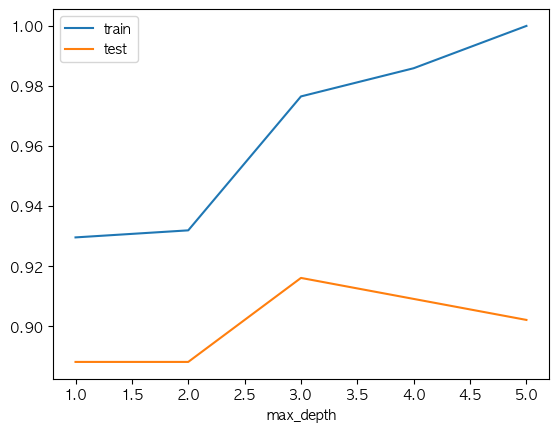

In [76]:
result_df.iloc[:-1].set_index('max_depth').plot()

>- train set 과 val set 의 차이가 많이나는 것은 좋지 않다.

# Grid Search 를 이용한 [하이퍼파라미터](#하이퍼파라미터란) 튜닝
- 모델의 성능을 가장 높게 하는 최적의 하이퍼파라미터를 찾는 방법.
- 하이퍼파라미터 후보들을 하나씩 입력해 모델의 성능이 가장 좋게 만드는 값을 찾는다.

## 종류
1. **Grid Search 방식**
    - sklearn.model_selection.**GridSearchCV**
        - 시도해볼 하이퍼파라미터들을 지정하면 모든 조합에 대해 교차검증 후 제일 좋은 성능을 내는 하이퍼파라미터 조합을 찾아준다.
        - 적은 수의 조합의 경우는 괜찮지만 시도할 하이퍼파라미터와 값들이 많아지면 너무 많은 시간이 걸린다.

1. **Random Search 방식**
    - sklearn.model_selection.**RandomizedSearchCV**
        - GridSeach와 동일한 방식으로 사용한다.
        - 모든 조합을 다 시도하지 않고 임의로 몇개의 조합만 테스트 한다.

### [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) 매개변수및 결과조회
- **Initializer 매개변수**
    - **estimator:** 모델객체 지정
    - **params :** 하이퍼파라미터 목록을 dictionary로 전달 '파라미터명':[파라미터값 list] 형식
    - **scoring:** 평가 지표
        - 평가지표문자열: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
        - 생략시 분류는 **accuracy**, 회귀는 **$R^2$** 를 기본 평가지표로 설정한다.
        - 여러개일 경우 List로 묶어서 지정
    - <span style='background-color:#fff5b1'>**refit:** best parameter를 정할 때 사용할 평가지표
        - scoring에 여러개의 평가지표를 설정한 경우<span style='background-color:#fff5b1'> refit을 반드시 설정해야 한다.
    - <span style='background-color:#fff5b1'>**cv:**</span> 교차검증시 fold 개수. 
    - <span style='background-color:#fff5b1'>**n_jobs:**</span> 사용할 CPU 코어 개수 (None:1(기본값), -1: 모든 코어 다 사용)

- **메소드**
    - **fit(X, y):** 학습
    - **predict(X):** 분류-추론한 class. 회귀-추론한 값
        - 제일 좋은 성능을 낸 모델로 predict()
    - **predict_proba(X):** 분류문제에서 class별 확률을 반환
        - 제일 좋은 성능을 낸 모델로 predict_proba() 호출

- **결과 조회 속성**
    - fit() 후에 호출 할 수 있다.
    - **cv_results_:** 파라미터 조합별 평가 결과를 Dictionary로 반환한다.
    - **best_params_:** 가장 좋은 성능을 낸 parameter 조합을 반환한다.
    - **best_estimator_:** 가장 좋은 성능을 낸 모델을 반환한다.
    - **best_score_:** 가장 좋은 점수 반환한다.

##### 데이터셋 로드 및 train/test set 나누기

##### GridSearchCV 생성

In [ ]:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
)

In [72]:
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier(random_state = 0) # 하이퍼파라미터를 찾을대상 모델
# 하이퍼파라미터 후보 - dictionary key: 하이퍼파라미터이름, value: 후보값들 리스트
params = {
    'max_depth': [1, 2, 3, 4, 5],
    'max_leaf_nodes': [3, 5, 7, 9]
    
    
}
gs = GridSearchCV(tree, # 모델
                 params, # 하이퍼파라미터 후보
                 scoring = 'accuracy', # 평가지표 - 하나일 경우 문자열로 지정. 여러개일 경우 List
                 cv = 4, # cross validation 의 fold 개수
                
                 n_jobs = -1
                  
                  
                 )

##### 학습

In [79]:
gs.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'max_leaf_nodes': [3, 5, 7, 9]},
             scoring='accuracy')

##### 결과 확인

In [98]:
print('best param:', gs.best_params_)

best param: {'max_depth': 2, 'max_leaf_nodes': 5}


In [99]:
print('best score:', gs.best_score_)

best score: 0.9248809733733028


In [85]:
gs.best_estimator_ # best parameter로 재 학습시킨 모델.

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=5, random_state=0)

In [86]:
gs.predict(X_train)

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,

In [91]:
result = pd.DataFrame(gs.cv_results_)
result.sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
5,0.001844,0.000126,0.000312,0.000059,2,5,"{'max_depth': 2, 'max_leaf_nodes': 5}",0.897196,0.953271,0.905660,0.943396,0.924881,0.023899,1
6,0.001782,0.000087,0.000261,0.000018,2,7,"{'max_depth': 2, 'max_leaf_nodes': 7}",0.897196,0.953271,0.905660,0.943396,0.924881,0.023899,1
7,0.001829,0.000129,0.000231,0.000007,2,9,"{'max_depth': 2, 'max_leaf_nodes': 9}",0.897196,0.953271,0.905660,0.943396,0.924881,0.023899,1
17,0.002539,0.000076,0.000306,0.000030,5,5,"{'max_depth': 5, 'max_leaf_nodes': 5}",0.906542,0.925234,0.915094,0.943396,0.922567,0.013726,4
13,0.002498,0.000083,0.000310,0.000028,4,5,"{'max_depth': 4, 'max_leaf_nodes': 5}",0.906542,0.925234,0.915094,0.943396,0.922567,0.013726,4


##### best model을 이용해 Test set 최종평가

In [106]:
best_model = gs.best_estimator_ # best parameter로 제학습한 모델을 반환.
accuracy_score(y_test, best_model.predict(X_test))

0.8881118881118881

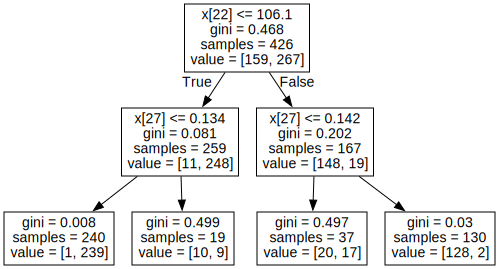

In [98]:
g = Source(export_graphviz(best_model))
g

##### 여러 성능지표를 확인
- 여러 성능지표는 확인할 수 있지만 최적의 파라미터를 찾기 위해서는 하나의 지표만 사용한다. 
    - scoring에 리스트로 평가지표들 묶어서 설정
    - refit에 최적의 파라미터 찾기 위한 평가지표 설정

##### GridSearchCV 생성

In [100]:
gs2 = GridSearchCV(tree,
                  params,
                  scoring = ['accuracy', 'f1'],
                  refit = 'accuracy', # 어떤 평가지표로 순위를 정할 것인지 지정. 지정한 평가 지표가 가장 좋은 파라미타러 모델을 재학습시킨다.
                  cv = 4,
                  n_jobs = -1)
        

##### 학습

In [101]:
gs2.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'max_leaf_nodes': [3, 5, 7, 9]},
             refit='accuracy', scoring=['accuracy', 'f1'])

##### 결과확인

In [102]:
gs2.best_score_
gs2.best_params_

{'max_depth': 2, 'max_leaf_nodes': 5}

In [103]:
result2 = pd.DataFrame(gs2.cv_results_)
result2.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_max_leaf_nodes', 'params',
       'split0_test_accuracy', 'split1_test_accuracy', 'split2_test_accuracy',
       'split3_test_accuracy', 'mean_test_accuracy', 'std_test_accuracy',
       'rank_test_accuracy', 'split0_test_f1', 'split1_test_f1',
       'split2_test_f1', 'split3_test_f1', 'mean_test_f1', 'std_test_f1',
       'rank_test_f1'],
      dtype='object')

In [104]:
result2.sort_values('rank_test_accuracy').head()
result2.sort_values('rank_test_f1').head().head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,...,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,mean_test_f1,std_test_f1,rank_test_f1
5,0.002226,0.000226,0.001162,0.000094,2,5,"{'max_depth': 2, 'max_leaf_nodes': 5}",0.897196,0.953271,0.905660,...,0.924881,0.023899,1,0.913386,0.963504,0.924242,0.955224,0.939089,0.020842,1
6,0.002175,0.000153,0.001129,0.000022,2,7,"{'max_depth': 2, 'max_leaf_nodes': 7}",0.897196,0.953271,0.905660,...,0.924881,0.023899,1,0.913386,0.963504,0.924242,0.955224,0.939089,0.020842,1
7,0.002362,0.000461,0.001068,0.000059,2,9,"{'max_depth': 2, 'max_leaf_nodes': 9}",0.897196,0.953271,0.905660,...,0.924881,0.023899,1,0.913386,0.963504,0.924242,0.955224,0.939089,0.020842,1
17,0.002477,0.000090,0.001061,0.000132,5,5,"{'max_depth': 5, 'max_leaf_nodes': 5}",0.906542,0.925234,0.915094,...,0.922567,0.013726,4,0.923077,0.942857,0.931298,0.954545,0.937944,0.011884,4
13,0.002437,0.000075,0.000894,0.000024,4,5,"{'max_depth': 4, 'max_leaf_nodes': 5}",0.906542,0.925234,0.915094,...,0.922567,0.013726,4,0.923077,0.942857,0.931298,0.954545,0.937944,0.011884,4


##### best model을 이용해 Test set 최종평가

In [105]:
accuracy_score(y_test, gs.predict(X_test))

0.8881118881118881

### [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
- <span style='background-color:#fff5b1'> **Initializer 매개변수**
    - **estimator:** 모델객체 지정
    - **param_distributions:** 하이퍼파라미터 목록을 dictionary로 전달 '파라미터명':[파라미터값 list] 형식
    -   **<font color='red'>n_iter</font>:** 전체 조합중 몇개의 조합을 테스트 할지 개수 설정
    - **scoring:** 평가 지표
    - **refit:** best parameter를 정할 때 사용할 평가지표. Scoring에 여러개의 평가지표를 설정한 경우 설정.
    - **cv:** 교차검증시 fold 개수. 
    - **n_jobs:** 사용할 CPU 코어 개수 (None:1(기본값), -1: 모든 코어 다 사용)

- <span style='background-color:#fff5b1'>**메소드**
    - **fit(X, y):** 학습
    - **predict(X):** 분류-추론한 class. 회귀-추론한 값
        - 제일 좋은 성능을 낸 모델로 predict()
    - **predict_proba(X):** 분류문제에서 class별 확률을 반환
        - 제일 좋은 성능을 낸 모델로 predict_proba() 호출

- <span style='background-color:#fff5b1'>**결과 조회 속성**
    - fit() 후에 호출 할 수 있다.
    - **cv_results_:** 파라미터 조합별 평가 결과를 Dictionary로 반환한다.
    - **best_params_:** 가장 좋은 성능을 낸 parameter 조합을 반환한다.
    - **best_estimator_:** 가장 좋은 성능을 낸 모델을 반환한다.
    - **best_score_:** 가장 좋은 점수 반환한다.

##### 데이터셋 로드 및 train/test set 나누기

##### 학습

##### RandomizedSearchCV 생성

In [108]:
from sklearn.model_selection import RandomizedSearchCV


params2 = {
    'max_depth': range(1,6),
    'max_leaf_nodes': range(3, 31, 3),
    'max_features':[0.1, 0.5, 1.0]
    
    
}
print('하이퍼파라미터 총 조합수:', (5*10*3))

rs = RandomizedSearchCV(DecisionTreeClassifier(random_state = 0),
                       params2,
                       n_iter = 5, 
                        scoring = 'accuracy',
                        cv = 4,
                        n_jobs = -1)
rs.fit(X_train,y_train)

하이퍼파라미터 총 조합수: 150


RandomizedSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': range(1, 6),
                                        'max_features': [0.1, 0.5, 1.0],
                                        'max_leaf_nodes': range(3, 31, 3)},
                   scoring='accuracy')

##### 결과확인

In [147]:
result3 = pd.DataFrame(rs.cv_results_)
result3

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_leaf_nodes,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000844,0.000055,0.000312,0.000004,15,0.1,1,"{'max_leaf_nodes': 15, 'max_features': 0.1, 'm...",0.887850,0.943925,0.915094,0.896226,0.910774,0.021534,3
1,0.000726,0.000029,0.000279,0.000016,6,0.1,2,"{'max_leaf_nodes': 6, 'max_features': 0.1, 'ma...",0.887850,0.943925,0.915094,0.896226,0.910774,0.021534,3
2,0.001239,0.000100,0.000257,0.000004,9,1.0,1,"{'max_leaf_nodes': 9, 'max_features': 1.0, 'ma...",0.841121,0.906542,0.905660,0.896226,0.887388,0.027016,5
3,0.002416,0.000132,0.000322,0.000054,18,1.0,3,"{'max_leaf_nodes': 18, 'max_features': 1.0, 'm...",0.897196,0.906542,0.915094,0.943396,0.915557,0.017274,2
4,0.001783,0.000048,0.000359,0.000041,27,0.5,4,"{'max_leaf_nodes': 27, 'max_features': 0.5, 'm...",0.925234,0.962617,0.924528,0.971698,0.946019,0.021382,1


In [137]:
result3.shape

(5, 15)

In [154]:
rs.best_score_
rs.best_params_

{'max_leaf_nodes': 27, 'max_features': 0.5, 'max_depth': 4}

##### best model을 이용해 Test set 최종평가

In [155]:
best_model2 = rs.best_estimator_
accuracy_score(y_test, best_model2.predict(X_test))

0.9440559440559441

In [157]:
accuracy_score(y_test, rs.predict(X_test))

0.9440559440559441

# <span style='background-color:#fff5b1'> 파이프라인 (Pipeline)
- 개요
    - 여러 단계의 머신러닝 프로세스 (전처리의 각 단계, 모델생성, 학습) 처리 과정을 설정하여 한번에 처리되도록 한다.
- 파이프라인은 여러개의 변환기와 마지막에 변환기 또는 추정기를 넣을 수 있다. (추정기-Estimator는 마지막에만 올 수 있다.)
- <span style='background-color:#fff5b1'>전처리 작업 파이프라인
    - 변환기들로만 구성
- <span style='background-color:#fff5b1'>전체 프로세스 파이프 라인
    - 마지막에 추정기를 넣는다

## <span style='background-color:#fff5b1'>Pipeline 생성
- (이름, 변환기) 를 리스트로 묶어서 전달한다.
- 마지막에는 추정기가 올 수있다.

## <span style='background-color:#fff5b1'>Pipeline 을 이용한 학습
- <span style='background-color:#fff5b1'>pipeline.fit() 
    - 각 순서대로 각 변환기의 fit_transform()이 실행되고 결과가 다음 단계로 전달된다. 마지막 단계에서는 fit()만 호출한다.
    - 마지막이 추정기일때 사용
- <span style='background-color:#fff5b1'>pipeline.fit_transform()
    - fit()과 동일하나 마지막 단계에서도 fit_transform()이 실행된다.
    - 전처리 작업 파이프라인(모든 단계가 변환기)일 때  사용
- 마지막이 추정기(모델) 일 경우
    - predict(X), predict_proba(X)
    - 추정기를 이용해서 X에 대한 결과를 추론
    - 모델 앞에 있는 변환기들을 이용해서 transform() 그 처리결과를 다음 단계로 전달

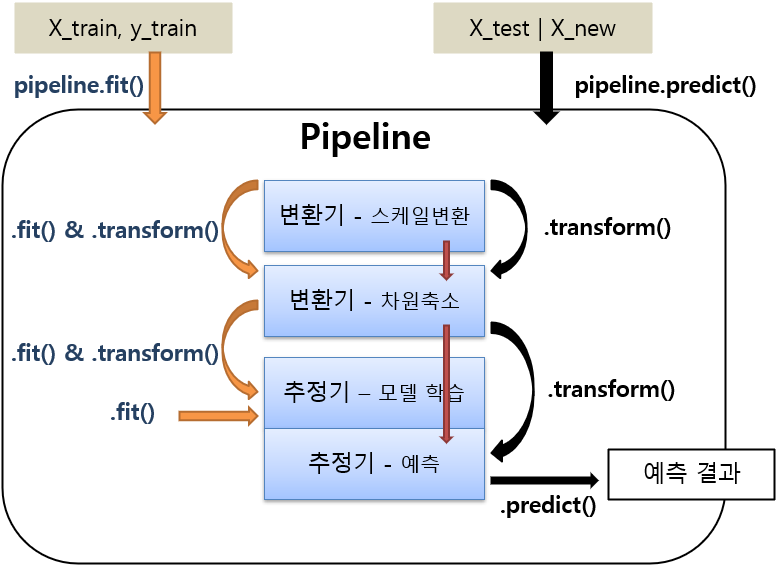

##### 데이터셋 로드, train/test set 분리

- breast cancer dataset => 모든 feature 연속형
1. Feature Scaling
2. SVM

##### Pipeline 생성

In [120]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline


steps = [
    ('scaler', StandardScaler()),   # 첫번째 프로세스
    ('svm', SVC(random_state = 0)), # 두번쨰 프로세스 (추론기 - 모델 은 마지막 프로세스로만 올 수 있다.)
       
]
pipeline = Pipeline(steps, verbose = True)  # verbose = 실행로그(기록)를 출력 ==> 어떤 단계를 실행하고 있는지, 걸린시간.
print(pipeline.steps)

[('scaler', StandardScaler()), ('svm', SVC(random_state=0))]


##### 학습

In [121]:
pipeline.fit(X_train, y_train)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing svm, total=   0.0s


Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(random_state=0))],
         verbose=True)

##### 추론 및 평가

In [122]:
train_pred = pipeline.predict(X_train)
test_pred = pipeline.predict(X_test)

accuracy_score(y_train, train_pred), accuracy_score(y_test, test_pred)

(0.9929577464788732, 0.958041958041958)

##### 새로운 데이터에 대한 추론

In [123]:
new_data = X_test[:5]
pipeline.predict(new_data)

array([1, 0, 0, 1, 0])

In [172]:
y_test[:5]

array([1, 0, 0, 1, 0])

### <span style='background-color:#fff5b1'> pipeline을 파일로 저장 => 직렬화
- pickle

In [173]:
import pickle
# 저장
with open('pipeline.pk1', 'wb') as fw:
    pickle.dump(pipeline, fw)

In [176]:
# 저장된 pipeline 로딩
with open('pipeline.pk1', 'rb') as fr:
    saved_pl = pickle.load(fr)

In [177]:
type(saved_pl), saved_pl.steps

(sklearn.pipeline.Pipeline,
 [('scaler', StandardScaler()), ('svm', SVC(random_state=0))])

In [178]:
accuracy_score(y_test, saved_pl.predict(X_test))

0.958041958041958

## GridSearch에서 Pipeline 사용
- 하이퍼파라미터 지정시 파이프라인 `프로세스이름__하이퍼파라미터` 형식으로 지정한다.
1. Pipeline 생성
2. GridSearchCV의 estimator에 pipeline 등록

##### Pipeline 생성

In [146]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA # 차원 축소 => features의 개수를 줄여준다.
from sklearn.svm import SVC

In [135]:
steps = [
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('svm', SVC(random_state = 0))
]
pl = Pipeline(steps, verbose = True)

##### GridSearchCV 생성

In [136]:
# SVC의 Hyper parameter => C, gamma: float 0.0 ~  => 0보다 큰 실수
params = { # key: 모델이름_파라미터이름, value: 값후보들
    'svm__C':[0.01, 0.1, 0.5, 1],
    'svm__gamma':[0.01, 0.1, 0.5, 1],
    'pca__n_components':[30, 20, 15, 10, 5]
}


gs = GridSearchCV(pl,
                params,
                scoring = 'accuracy',
                cv = 4,
                n_jobs = -1)
gs.fit(X_train, y_train)

[Pipeline] ............ (step 1 of 3) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing pca, total=   0.0s
[Pipeline] ............... (step 3 of 3) Processing svm, total=   0.0s


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('svm', SVC(random_state=0))],
                                verbose=True),
             n_jobs=-1,
             param_grid={'pca__n_components': [30, 20, 15, 10, 5],
                         'svm__C': [0.01, 0.1, 0.5, 1],
                         'svm__gamma': [0.01, 0.1, 0.5, 1]},
             scoring='accuracy')

In [137]:
gs.best_params_

{'pca__n_components': 5, 'svm__C': 1, 'svm__gamma': 0.1}

In [138]:
gs.best_score_

0.9765914300828777

In [144]:
best_model = gs.best_estimator_
accuracy_score(y_test, best_model.predict(X_test))

0.9440559440559441

## make_pipeline() 함수를 이용한 파이프라인 생성을 편리하게 하기
- make_pipeline(변환기객체, 변환기객체, ....., 추정기객체): Pipeline 
- 프로세스의 이름을 프로세스클래스이름(소문자로변환)으로 해서 Pipeline을 생성.

In [141]:
from sklearn.pipeline import make_pipeline
pipeline2 = make_pipeline(StandardScaler(), PCA(5), SVC(C = 1, gamma = 0.1))
pipeline2.steps

[('standardscaler', StandardScaler()),
 ('pca', PCA(n_components=5)),
 ('svc', SVC(C=1, gamma=0.1))]

In [142]:
pipeline2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=5)), ('svc', SVC(C=1, gamma=0.1))])

In [143]:
accuracy_score(y_test, pipeline2.predict(X_test))

0.9440559440559441

# 사용자 정의 Transformer(전처리 변환기) 구현

In [ ]:
from sklearn.base import TransformerMixin
class MyTransformer(TransformerMixin):
    
    def __init__(self[ , ....]):
        # 초기화
        pass
    
    def fit(self,X, y = None):
        # 어떻게 변환할 지 학습
        # 변환할 때 필요한 값들(MinMaxScaler의 min, max값)를 찾아서 attribute 로 저장.
        return self
    def transform(self, X, y = None):
            # x 를 변환한다.
            # 변환할 떄 fit()에서 찾은 값을 이용해서 처리
        return X를 변환한 데이터셋
# fit_transfomer() 메소드는 상위 클래스인 TransformerMixin에 구현되 있다. ( fit()과 transform()을 순서대로 호출. )

In [30]:
from sklearn.base import TransformerMixin

class MissingValueProcess(TransformerMixin):
    """
    결측치를 처리하는 변환기(전처리기)
    문자열타입(object) - 최빈값으로 변환
    숫자타임(float) - 중위수(중앙값)으로 변환 
    """
    def __init__(self):
        pass
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        """
        X: DataFrame
        """
                                                   # feature 별(컬럼)로 처리
        X = X.copy()                               # 원본 유지를 위해서 복사본 DF 생성
        for colname in X.columns:
                                                   # object 타입인지, float 타입인지에 따라 분기.
            if X[colname].dtype == 'object':       # 문자열 컬럼
                mode = X[colname].mode()[0]        # 최빈값 으로 변경하는 mode 생성
                X[colname].fillna(mode, inplace = True)    # fillna로 'object'형 결측치를 최빈값으로 변경
                
            elif X[colname].dtype == 'float':      # 실수형 타입
                median = X[colname].median()       # 중앙값으로 변경하는 median 생성
                X[colname].fillna(median, inplace =  True) # fillna 로 'float'형 걸측치를 중앙값으로 변경
        return X

In [31]:
cols = ['age', 'workclass','fnlwgt','education', 'education-num', 'marital-status', 'occupation','relationship', 'race', 'gender','capital-gain','capital-loss', 'hours-per-week','native-country', 'income']
category_columns = ['workclass','education','marital-status', 'occupation','relationship','race','gender','native-country']
continuous_columns = ['age','fnlwgt', 'education-num','capital-gain','capital-loss','hours-per-week']
target = 'income'

In [32]:
import pandas as pd
df = pd.read_csv('data/adult.data', header = None, na_values = '?', skipinitialspace = True, names = cols)
df.shape

(32561, 15)

In [33]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [34]:
import numpy as np
df.loc[:10, 'age'] = np.nan

In [35]:
df.isnull().sum()

age                 11
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [36]:
df['age'].median()

37.0

In [37]:
df[['workclass', 'occupation', 'native-country']].mode()

,workclass,occupation,native-country
0,Private,Prof-specialty,United-States


In [41]:
# MissingValuesProcessor 를 이용해서 Adult Dataset의 결측치를 처리
mvp = MissingValueProcess()
mvp.fit(df)
adult_df = mvp.transform(df)

In [49]:
adult_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,37.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,37.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,37.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,37.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,37.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40.0,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58.0,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22.0,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [42]:
adult_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [43]:
adult_df.loc[10]

age                             37.0
workclass                    Private
fnlwgt                        280464
education               Some-college
education-num                     10
marital-status    Married-civ-spouse
occupation           Exec-managerial
relationship                 Husband
race                           Black
gender                          Male
capital-gain                       0
capital-loss                       0
hours-per-week                    80
native-country         United-States
income                          >50K
Name: 10, dtype: object

In [44]:
np.where(adult_df['workclass'] != df['workclass'])

(array([   27,    61,    69, ..., 32539, 32541, 32542]),)

In [47]:
adult_df.loc[[27, 61, 69, 32539], 'workclass']

27       Private
61       Private
69       Private
32539    Private
Name: workclass, dtype: object

In [ ]:
# Adult 데이터셋의 범주형 컬럼들을 onehot encoding 처리.
# Adult 데이터셋의 연속형 컬럼들은 standard scaling 처리.

In [50]:
from sklearn.model_selection import train_test_split

y = adult_df[target]
X = adult_df.drop(columns = target)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 0)

In [55]:
category_columns = ['workclass','education','marital-status', 'occupation','relationship','race','gender','native-country']
continuous_columns = ['age','fnlwgt', 'education-num','capital-gain','capital-loss','hours-per-week']
target = 'income'

In [116]:
from sklearn.preprocessing import OneHotEncoder


# Adult 데이터셋의 범주형 컬럼들을 onehot encoding 처리.

class AdultOneHotEncoder(TransformerMixin):
    
    def __init__(self, unique_values):
                                               # 범주형 컬럼명 리스트를 attribute 로 저장
                                               # unique_values: dictionary - key: 컬럼명, value: 컬럼의 class 값 리스트
        self.category_colname = category_columns
        self.unique_values = unique_values
        
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        X = X.copy()                                     # 복사본 생성.
                                                         # 범주형 컬럼값들을 조회 => 변환대상
        cate_col = X[self.category_colname]
                                                         # 연속형 컬럼의 이름 조회 => 원핫인코딩 후에 연속형 컬럼값들을 그 결과에 추가하기 위해.
        cont_colname = list(set(X.columns) - set(self.category_colname))
        cont_col = X[cont_colname].values                # 연속형 컬럼값들 조회 후  ndarray로 변환
        
        result_colname = []                              # 원핫인코딩된 컬럼명들을 저장할 리스트
        result = np.empty(shape = (X.shape[0],0))        # 원핫 인코딩된 결과를 저장할 변수.
        
        for colname in self.category_colname:            # 각 feature 별로 one hot encoding 처리.
            ohe = OneHotEncoder(sparse_output = False)
            ohe.fit(self.unique_values[colname].reshape(-1, 1))
            v = ohe.transform(X[colname].values.reshape(-1,1))
            result = np.append(result, v, axis = 1)                 # ohe 결과를 result에 추가
            result_colname = result_colname + list(ohe.get_feature_names_out()) # ohe 된 컬럼명을 모으는 작업.
            
            # 연속형 값 + 원핫인코딩된결과
        values = np.concatenate([cont_col, result], axis = 1)
        return pd.DataFrame(values, columns = cont_colname + result_colname)

In [120]:
# 각 feature들의 class 값들을 저장.
unique_values = {}
for colname in category_columns:
    unique_values[colname] = X[colname].unique() # X: train / test 나누기 전 전체 데이터

In [121]:
aohe = AdultOneHotEncoder(unique_values)
aohe.fit(X_train)
X_train_ohe = aohe.transform(X_train)
X_test_ohe = aohe.transform(X_test)

In [122]:
print(X_train_ohe.shape)
print(X_test_ohe.shape)
X_train.head(2)

(24420, 105)
(8141, 105)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
28291,25.0,Private,193379,Assoc-acdm,12,Never-married,Craft-repair,Not-in-family,White,Male,0,0,45,United-States
28636,55.0,Federal-gov,176904,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States


In [209]:
# Adult 데이터셋의 연속형 컬럼들을 standard scaling 처리.

from sklearn.preprocessing import StandardScaler

class AdultScaler(TransformerMixin):
    
    def __init__(self):
        self.cont_colname = continuous_columns
        self.scaler = StandardScaler()
     
    def fit(self, X, y = None):
        self.scaler.fit(X[self.cont_colname])
        return self
    
    def transform(self, X, y = None):
        X = X.copy()
        category_colname = list(X.columns.drop(self.cont_colname))
#         scaler = StandardScaler()
        v_cont = self.scaler.transform(X[self.cont_colname]) # 연속형 colname만 검색해서 fit_transform을 해준다.
        v_cate = X[category_colname].values
        result = np.concatenate([v_cont, v_cate], axis = 1)
        return pd.DataFrame(result, columns = self.cont_colname + category_colname)

In [210]:
ascaler = AdultScaler()
s = ascaler.fit(X_train)
result = s.transform(X_train)
result.shape

(24420, 14)

In [188]:
result['age'].mean(), result['age'].std()

(-9.150019899101516e-17, 1.000020475649336)

In [212]:
result2 = ascaler.transform(X_test)
result2['age'].mean(), result2['age'].std(), result['age'].mean(), result['age'].std()

(-0.005812989802295297,
 0.992989636710793,
 -9.150019899101516e-17,
 1.000020475649336)

In [216]:
# pipeline 생성
from sklearn.svm import SVC
transformer_steps = [
    ('ohe', AdultOneHotEncoder(unique_values)),
    ('scaler', AdultScaler())

]

steps = transformer_steps + [('svm', SVC(random_state = 0))]

In [214]:
steps = [
    ('ohe', AdultOneHotEncoder(unique_values)), 
    ('scaler', AdultScaler()),
    ('svm', SVC(random_state=0))
]
# steps
pipeline = Pipeline(steps=steps, verbose=True)
pipeline.fit(X_train,y_train)

[Pipeline] ............... (step 1 of 3) Processing ohe, total=   0.1s
[Pipeline] ............ (step 2 of 3) Processing scaler, total=   0.0s
[Pipeline] ............... (step 3 of 3) Processing svm, total=  15.8s


Pipeline(steps=[('ohe', <__main__.AdultOneHotEncoder object at 0x7f96d3196130>),
                ('scaler', <__main__.AdultScaler object at 0x7f96d3196b20>),
                ('svm', SVC(random_state=0))],
         verbose=True)

In [200]:
train_pred = pipeline.predict(X_train)

In [202]:
test_pred = pipeline.predict(X_test)

In [204]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, train_pred), accuracy_score(y_test, test_pred)

(0.8679361179361179, 0.8507554354501904)

In [198]:
from sklearn.pipeline import Pipeline
trans_pipeline = Pipeline(transformer_steps)
trans_pipeline.fit(X_train,y_train)
X_result = trans_pipeline.transform(X_train)
X_result.shape

(24420, 105)

In [199]:
X_result.head(2)
# X_result['age'].mean(), X_result['age'].std()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,x0_Federal-gov,x0_Local-gov,x0_Never-worked,x0_Private,...,x0_Portugal,x0_Puerto-Rico,x0_Scotland,x0_South,x0_Taiwan,x0_Thailand,x0_Trinadad&Tobago,x0_United-States,x0_Vietnam,x0_Yugoslavia
0,-0.995361,0.033774,0.743214,-0.146408,-0.212543,0.375733,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.200288,-0.122123,-0.415226,-0.146408,-0.212543,-0.029795,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
